# DDA3020 Assignment 1 - Coding problem 2

*Mengkang Li     <mengkangli@link.cuhk.edu.cn>*

*School of Data Science, The Chinese University of Hongkong, Shenzhen*

*2024.02.12*

In this file, I will finish the second problem of dda3020 assignment1. 

## Step 1: Use numpy to implement linear regression with gradient descent

In [1]:
# Train of linear regression
"""

train: 
predict: 

"""
import numpy as np
import pandas as pd
class linear_regression():
    def __init__(self):
        self.w = None
        self.X = None
        self.y = None
        self.loss_record = []

    def train(self, X, y, alpha=0.005, gamma=0.00001, iteration=1000, random_state=None):
        def gradient(w, X, y):
            return np.dot(X.T, (np.dot(X, w) - y))
        def loss(w, X, y):
            return np.sqrt(np.mean((np.dot(X, w) - y)**2))
        if random_state is not None:
            np.random.seed(random_state)

        X_sub = np.insert(X, 0, 1, axis=1)
        w = np.random.uniform(0, 1, size=X_sub.shape[1])
        grad = gradient(w, X_sub, y)
        iter_num = 0
        while np.linalg.norm(grad) >= gamma and iter_num < iteration: 
            w = w - grad * alpha
            grad = gradient(w, X_sub, y)
            lo = loss(w, X_sub, y)
            self.loss_record.append(lo)
            iter_num += 1
        self.w = w
    def predict(self, X):
        X_sub = np.insert(X, 0, 1, axis=1)
        y_pred = np.dot(X_sub, self.w.T) 
        return y_pred
    def get_paras(self):
        return self.w

## Step 2: Train the model and check loss

In [2]:
# Load the dataset and check the basic info of it

from sklearn.datasets import load_diabetes

data = load_diabetes().data
targets = load_diabetes().target

data = np.array(data)
targets = np.array(targets)

print(data.shape)
print(targets.shape)

(442, 10)
(442,)


In [3]:
# Split the dataset, train and predict. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=314)

lg = linear_regression()
lg.train(X_train, y_train)
y_pred = lg.predict(X_test)


In [4]:
# Analysis

from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train, lg.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Train RMSE: \t", str(train_rmse))
print("Test RMSE: \t", str(test_rmse))

Train RMSE: 	 53.79452469630373
Test RMSE: 	 53.51329340198955


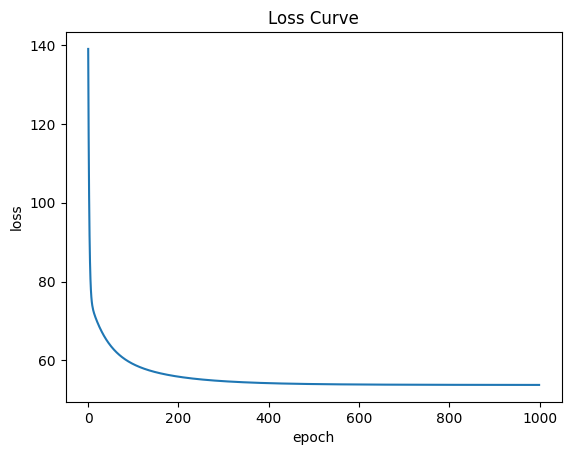

In [5]:
# Plot the loss function

import matplotlib.pyplot as plt

loss = np.array(lg.loss_record)
plt.plot(np.arange(loss.shape[0]), loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss Curve")
plt.show()

## Step 3: Tuning the parameters

In [6]:
# Choose different parameters
import numpy as np

step_sizes = np.arange(0.001, 0.011, 0.001)
iterations = np.arange(100, 2100, 200)
gammas = np.arange(0, 0.1, 0.01)



In [7]:
# Train the model ---------- step size
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

data = load_diabetes().data
target = load_diabetes().target

for step_size in step_sizes:
    print("TUNING: step size = " + str(step_size))
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=314)
    lr = linear_regression()
    lr.train(X_train, y_train, alpha=step_size)
    y_pred_train = lr.predict(X_train)
    y_pred = lr.predict(X_test)

    if np.any(np.isinf(y_pred)) or np.any(np.isinf(y_pred_train)):
        print("ERROR: The model cannot converge to a finite value.")
        continue
    print("Train RMSE: " + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    print("Test RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

TUNING: step size = 0.001
Train RMSE: 55.907887409184774
Test RMSE: 55.563983706185496
TUNING: step size = 0.002
Train RMSE: 54.243912054966614
Test RMSE: 54.12513849757022
TUNING: step size = 0.003
Train RMSE: 53.90202843134897
Test RMSE: 53.71988622704383
TUNING: step size = 0.004
Train RMSE: 53.81917756076476
Test RMSE: 53.574007837855106
TUNING: step size = 0.005
Train RMSE: 53.79446233065542
Test RMSE: 53.51330107327865
TUNING: step size = 0.006
Train RMSE: 4.335053761320481e+50
Test RMSE: 4.3347142840749285e+50
TUNING: step size = 0.007
Train RMSE: inf
Test RMSE: inf
TUNING: step size = 0.008
Train RMSE: inf
Test RMSE: inf
TUNING: step size = 0.009000000000000001
ERROR: The model cannot converge to a finite value.
TUNING: step size = 0.010000000000000002
ERROR: The model cannot converge to a finite value.


d:\miniconda3\envs\dda3020\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Mengkang Li\AppData\Local\Temp\ipykernel_213256\1884676641.py:21: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.mean((np.dot(X, w) - y)**2))
d:\miniconda3\envs\dda3020\Lib\site-packages\sklearn\metrics\_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
d:\miniconda3\envs\dda3020\Lib\site-packages\sklearn\metrics\_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
d:\miniconda3\envs\dda3020\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Mengkang Li\AppData\Local\Temp\i

In [8]:
# Train the model ---------- Iterations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

data = load_diabetes().data
target = load_diabetes().target

for iteration in iterations:
    print("TUNING: iteration = " + str(iteration))
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=314)
    lr = linear_regression()
    lr.train(X_train, y_train, iteration=iteration)
    y_pred_train = lr.predict(X_train)
    y_pred = lr.predict(X_test)

    if np.any(np.isinf(y_pred)) or np.any(np.isinf(y_pred_train)):
        print("ERROR: The model cannot converge to a finite value.")
        continue
    print("Train RMSE: " + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    print("Test RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

TUNING: iteration = 100
Train RMSE: 59.11962684787393
Test RMSE: 58.146524358346774
TUNING: iteration = 300
Train RMSE: 54.745565454783865
Test RMSE: 54.60032248783482
TUNING: iteration = 500
Train RMSE: 54.01157037792708
Test RMSE: 53.86764079154969
TUNING: iteration = 700
Train RMSE: 53.847276584939955
Test RMSE: 53.63043438066175
TUNING: iteration = 900
Train RMSE: 53.80348233091111
Test RMSE: 53.53751269257334
TUNING: iteration = 1100
Train RMSE: 53.78888703783833
Test RMSE: 53.49699111059314
TUNING: iteration = 1300
Train RMSE: 53.78211264456474
Test RMSE: 53.4771893807074
TUNING: iteration = 1500
Train RMSE: 53.77804425460679
Test RMSE: 53.466701873057964
TUNING: iteration = 1700
Train RMSE: 53.774726439458234
Test RMSE: 53.4602638192953
TUNING: iteration = 1900
Train RMSE: 53.77216201217334
Test RMSE: 53.45591439970531


In [9]:
# Train the model ---------- Terminal Gamma
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

data = load_diabetes().data
target = load_diabetes().target

for gamma in gammas:
    print("TUNING: gamma = " + str(gamma))
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=314)
    lr = linear_regression()
    lr.train(X_train, y_train, gamma=gamma)
    y_pred_train = lr.predict(X_train)
    y_pred = lr.predict(X_test)

    if np.any(np.isinf(y_pred)) or np.any(np.isinf(y_pred_train)):
        print("ERROR: The model cannot converge to a finite value.")
        continue
    print("Train RMSE: " + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    print("Test RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

TUNING: gamma = 0.0
Train RMSE: 53.7945079757642
Test RMSE: 53.51350030500922
TUNING: gamma = 0.01
Train RMSE: 53.79437183752501
Test RMSE: 53.513113885833896
TUNING: gamma = 0.02
Train RMSE: 53.794655106341075
Test RMSE: 53.51358681400401
TUNING: gamma = 0.03
Train RMSE: 53.79461384508285
Test RMSE: 53.513432694797956
TUNING: gamma = 0.04
Train RMSE: 53.7944649153218
Test RMSE: 53.51316732617473
TUNING: gamma = 0.05
Train RMSE: 53.79451479221746
Test RMSE: 53.51329761483402
TUNING: gamma = 0.06
Train RMSE: 53.79431719708405
Test RMSE: 53.51300694338491
TUNING: gamma = 0.07
Train RMSE: 53.79462149495048
Test RMSE: 53.51350370637522
TUNING: gamma = 0.08
Train RMSE: 53.79473689944641
Test RMSE: 53.51365495074356
TUNING: gamma = 0.09
Train RMSE: 53.79437761501933
Test RMSE: 53.51323963344149


In [10]:
# Train the model ---------- step size
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

data = load_diabetes().data
target = load_diabetes().target

params = [
    [0.0005, 100],
    [0.0005, 1000],
    [0.0005, 10000],
    [0.001, 100],
    [0.001, 1000],
    [0.001, 10000],
    [0.005, 100],
    [0.005, 1000],
    [0.005, 10000],
    [0.01, 100],
    [0.01, 1000],
    [0.01, 10000],
]
count = 1
for param in params:
    print(f"----------{count}----------")
    count += 1
    step_size = param[0]
    iteration = param[1]
    print("TUNING: step size = " + str(step_size))
    print("TUNING: iteration = " + str(iteration))
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=314)
    lr = linear_regression()
    lr.train(X_train, y_train, alpha=step_size, iteration=iteration)
    y_pred_train = lr.predict(X_train)
    y_pred = lr.predict(X_test)

    if np.any(np.isinf(y_pred)) or np.any(np.isinf(y_pred_train)):
        print("The model cannot converge to a finite value.")
        continue
    print("Train RMSE: " + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    print("Test RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

----------1----------
TUNING: step size = 0.0005
TUNING: iteration = 100
Train RMSE: 73.2804079080204
Test RMSE: 71.81630177869383
----------2----------
TUNING: step size = 0.0005
TUNING: iteration = 1000
Train RMSE: 59.14263533306856
Test RMSE: 58.16840808191002
----------3----------
TUNING: step size = 0.0005
TUNING: iteration = 10000
Train RMSE: 53.794698721495884
Test RMSE: 53.513844730115416
----------4----------
TUNING: step size = 0.001
TUNING: iteration = 100
Train RMSE: 70.08416138880258
Test RMSE: 68.54889299814279
----------5----------
TUNING: step size = 0.001
TUNING: iteration = 1000
Train RMSE: 55.90923958036356
Test RMSE: 55.5664713594169
----------6----------
TUNING: step size = 0.001
TUNING: iteration = 10000
Train RMSE: 53.7706473269497
Test RMSE: 53.45373486675532
----------7----------
TUNING: step size = 0.005
TUNING: iteration = 100
Train RMSE: 59.115335731772525
Test RMSE: 58.14479501820231
----------8----------
TUNING: step size = 0.005
TUNING: iteration = 1000
T

d:\miniconda3\envs\dda3020\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Mengkang Li\AppData\Local\Temp\ipykernel_213256\1884676641.py:21: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.mean((np.dot(X, w) - y)**2))
